In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sb
from matplotlib import rc

%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [122]:
df = pd.read_excel(r'전체동.xlsx')
df

,Unnamed: 0,동,자치구,출생,사망,전입,전출,혼인,이혼,cluster,주민센터 이름,주민센터 주소,위도,경도
0,0,개포1동,강남구,17,29,829,937,12,13,1,개포1동 주민센터,서울특별시 강남구 개포로 310-17,37.481054,127.053708
1,1,개포2동,강남구,152,57,9853,4191,61,28,0,개포2동 주민센터,서울특별시 강남구 개포로 511,37.489774,127.069120
2,2,개포4동,강남구,91,57,4408,3308,91,41,2,개포4동 주민센터,서울특별시 강남구 개포로38길 12,37.478999,127.051657
3,3,논현1동,강남구,93,81,5141,5967,112,45,0,논현1동 주민센터,서울특별시 강남구 학동로20길 25,37.511555,127.028446
4,4,논현2동,강남구,102,76,4171,4824,87,40,2,논현2동 주민센터,서울특별시 강남구 학동로43길 17,37.517375,127.037196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,422,상봉2동,중랑구,126,96,4437,4029,160,44,2,상봉2동 주민센터,서울특별시 중랑구 봉우재로 93-5,37.589362,127.074210
421,423,신내1동,중랑구,183,249,3719,4709,95,49,2,신내1동 주민센터,서울특별시 중랑구 용마산로129나길 35,37.605930,127.099529
422,424,신내2동,중랑구,132,139,2182,2903,74,39,1,신내2동 주민센터,서울특별시 중랑구 봉화산로 190,37.606256,127.094209
423,425,중화1동,중랑구,131,118,2619,3157,98,34,1,중화1동 주민센터,서울특별시 중랑구 동일로134길 17,37.601147,127.080641


In [123]:
df.drop(['Unnamed: 0','자치구','주민센터 이름','주민센터 주소','동','cluster'], inplace=True, axis=1)
df

,출생,사망,전입,전출,혼인,이혼,위도,경도
0,17,29,829,937,12,13,37.481054,127.053708
1,152,57,9853,4191,61,28,37.489774,127.069120
2,91,57,4408,3308,91,41,37.478999,127.051657
3,93,81,5141,5967,112,45,37.511555,127.028446
4,102,76,4171,4824,87,40,37.517375,127.037196
...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,37.589362,127.074210
421,183,249,3719,4709,95,49,37.605930,127.099529
422,132,139,2182,2903,74,39,37.606256,127.094209
423,131,118,2619,3157,98,34,37.601147,127.080641


## elbow

In [13]:
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()

C:\Users\MEDICI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


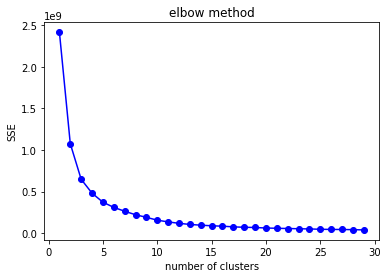

In [16]:
elbow(df,30)

## 실루엣

In [17]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

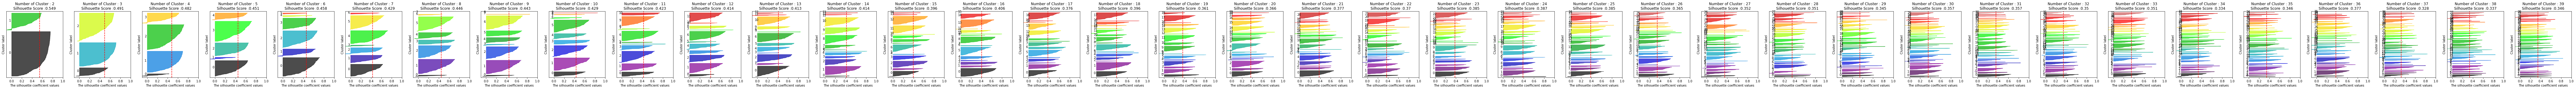

In [18]:
a = list(range(2,40))
visualize_silhouette(a, df)

#### elbow 에서는 3 혹은 4
#### 실루엣에서는 8~??

In [96]:
df.corr()

,출생,사망,전입,전출,혼인,이혼,위도,경도
출생,1.000000,0.448926,0.585885,0.618906,0.732868,0.535969,-0.103215,-0.044630
사망,0.448926,1.000000,0.355957,0.475793,0.484279,0.772879,0.277401,-0.089322
전입,0.585885,0.355957,1.000000,0.795881,0.650133,0.545326,-0.178976,0.004392
전출,0.618906,0.475793,0.795881,1.000000,0.706502,0.619849,-0.180180,-0.003576
혼인,0.732868,0.484279,0.650133,0.706502,1.000000,0.665780,-0.122300,-0.102623
이혼,0.535969,0.772879,0.545326,0.619849,0.665780,1.000000,0.122768,-0.048505
위도,-0.103215,0.277401,-0.178976,-0.180180,-0.122300,0.122768,1.000000,0.226131
경도,-0.044630,-0.089322,0.004392,-0.003576,-0.102623,-0.048505,0.226131,1.000000


In [20]:
import seaborn as sns

C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51077 missing 

C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51077 missing from curre

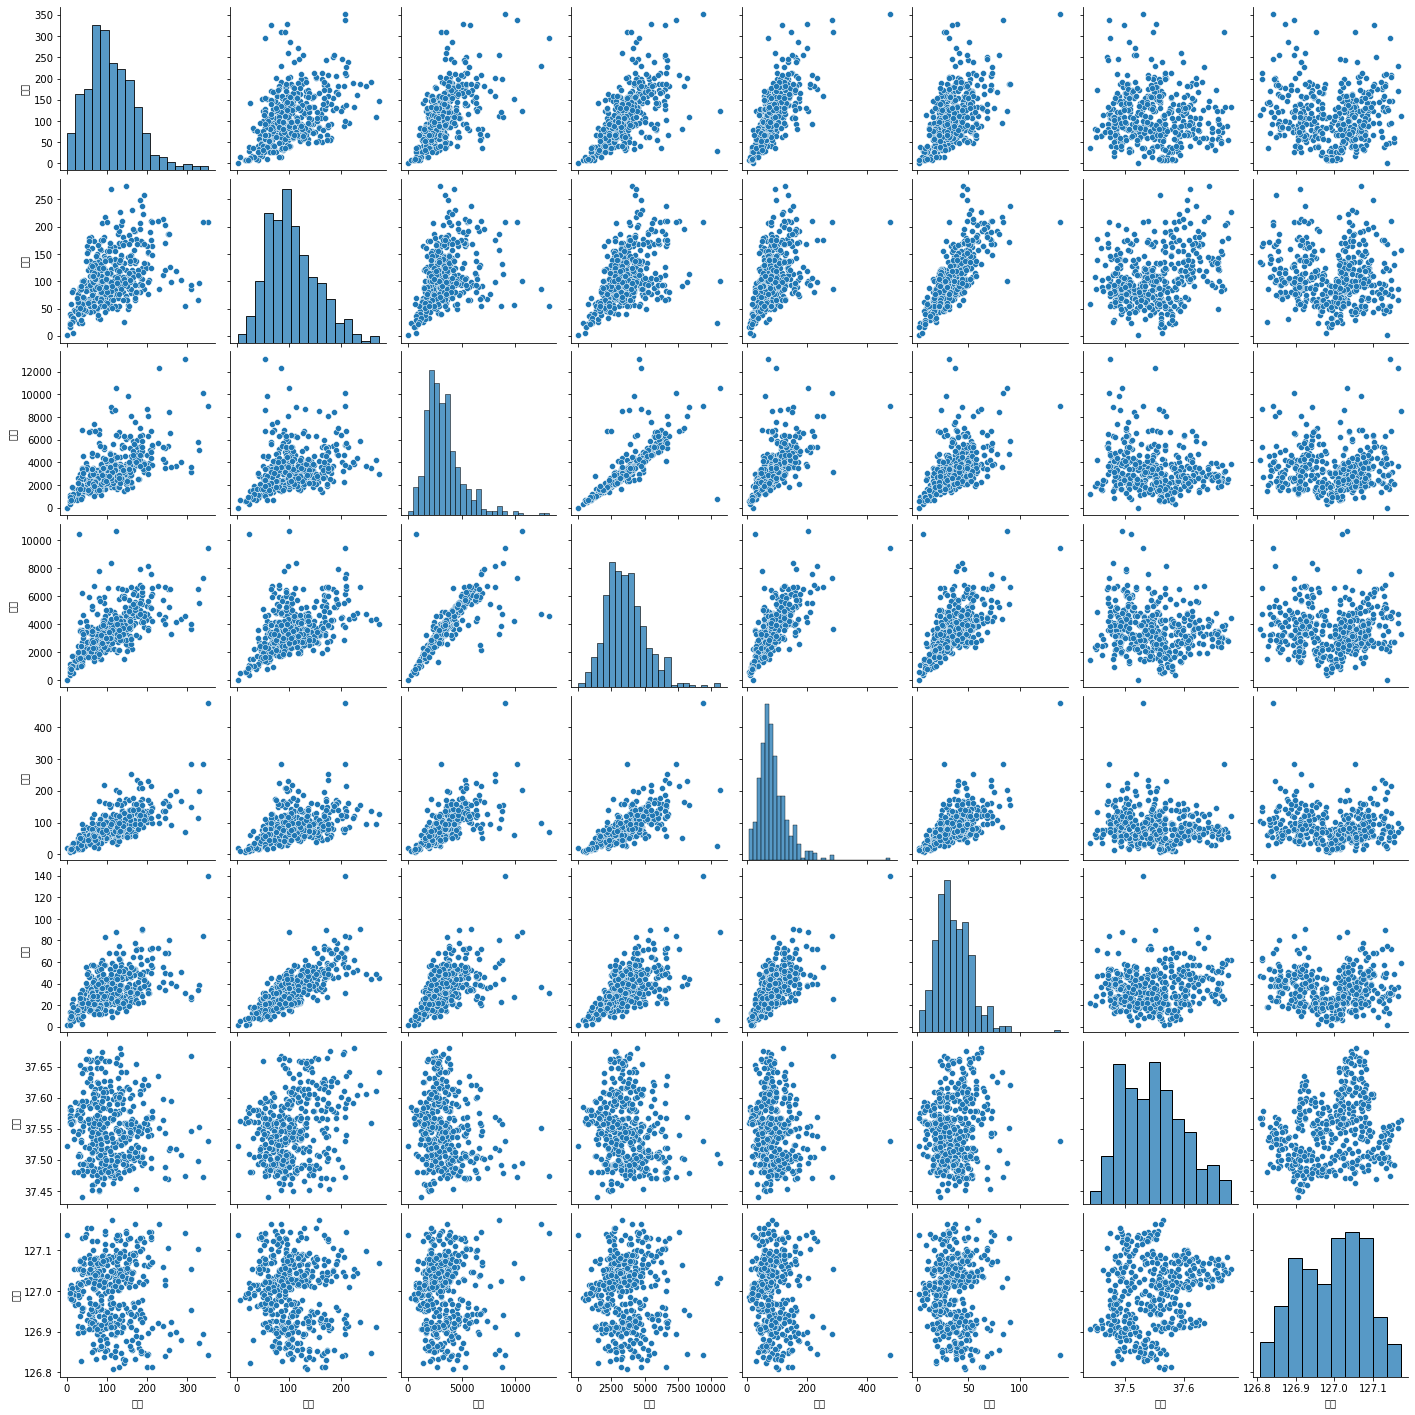

In [21]:
sns.pairplot(df)

C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51077 missing 

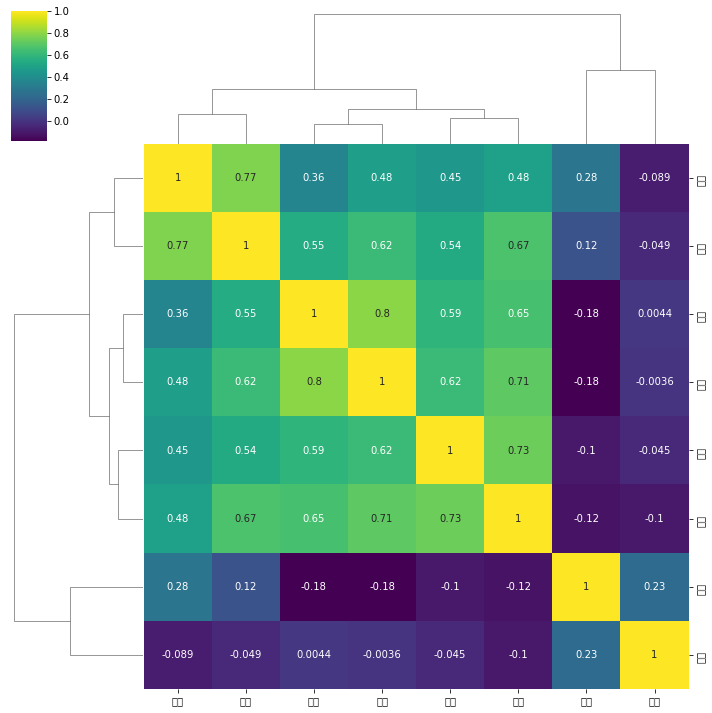

In [29]:
sns.clustermap(df.corr(), annot=True, cmap='viridis')

## k-menas

In [124]:
in_col = ['출생', '사망', '전입', '전출', '혼인', '이혼']
df_kmean = df[in_col]

In [125]:
df_kmean

,출생,사망,전입,전출,혼인,이혼
0,17,29,829,937,12,13
1,152,57,9853,4191,61,28
2,91,57,4408,3308,91,41
3,93,81,5141,5967,112,45
4,102,76,4171,4824,87,40
...,...,...,...,...,...,...
420,126,96,4437,4029,160,44
421,183,249,3719,4709,95,49
422,132,139,2182,2903,74,39
423,131,118,2619,3157,98,34


In [126]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(df_kmean)

KMeans(n_clusters=3, random_state=1234)

In [127]:
kmeans.cluster_centers_

array([[  72.07784431,   83.01796407, 1893.56287425, 2198.98802395,
          55.19760479,   25.23353293],
       [ 173.26666667,  135.        , 6664.85      , 6140.33333333,
         148.66666667,   51.36666667],
       [ 126.32323232,  118.97979798, 3545.81313131, 3983.73232323,
          95.32323232,   38.74242424]])

In [128]:
kmeans.labels_

array([0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0,
       2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2, 0,
       0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2,
       0, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 1,
       0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0,
       0, 0, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2,

In [129]:
df_kmean['cluster'] = kmeans.labels_
df_kmean

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_28204/2619916968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmean['cluster'] = kmeans.labels_


,출생,사망,전입,전출,혼인,이혼,cluster
0,17,29,829,937,12,13,0
1,152,57,9853,4191,61,28,1
2,91,57,4408,3308,91,41,2
3,93,81,5141,5967,112,45,1
4,102,76,4171,4824,87,40,2
...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2
421,183,249,3719,4709,95,49,2
422,132,139,2182,2903,74,39,0
423,131,118,2619,3157,98,34,0


In [130]:
df_kmean['cluster'].value_counts()

2    198
0    167
1     60
Name: cluster, dtype: int64

C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51077 missing 

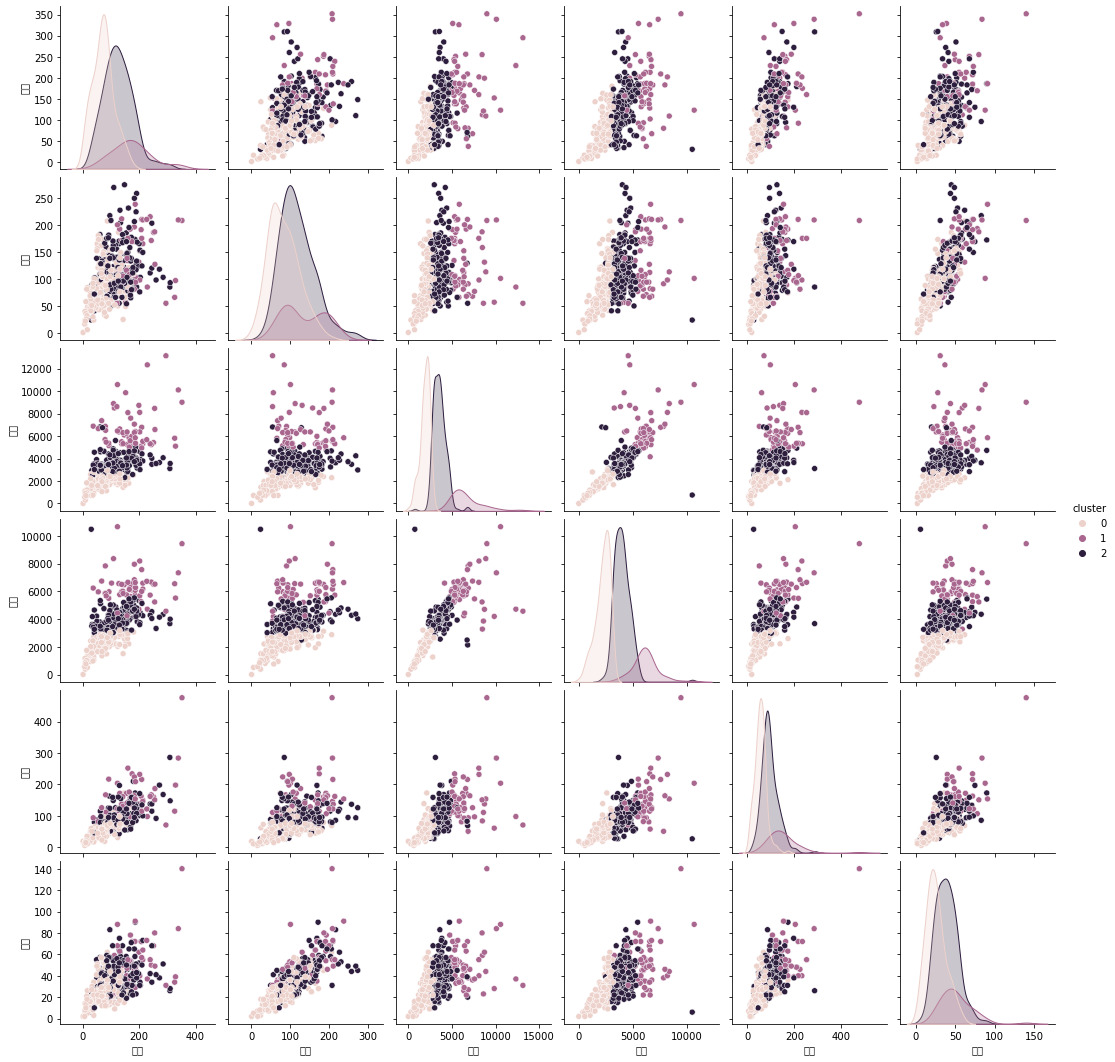

In [41]:
sns.pairplot(df_kmean, hue="cluster")

In [131]:
df_f = df.copy()
df_f.drop(["위도","경도"],axis=1, inplace=True)
df_f

,출생,사망,전입,전출,혼인,이혼
0,17,29,829,937,12,13
1,152,57,9853,4191,61,28
2,91,57,4408,3308,91,41
3,93,81,5141,5967,112,45
4,102,76,4171,4824,87,40
...,...,...,...,...,...,...
420,126,96,4437,4029,160,44
421,183,249,3719,4709,95,49
422,132,139,2182,2903,74,39
423,131,118,2619,3157,98,34


### scaling

In [200]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
standard_scaler = StandardScaler() 
scaled_df = pd.DataFrame(standard_scaler.fit_transform(df_f.iloc[:,0:6]), columns=df_f.iloc[:,0:6].columns)

In [201]:
kmeans.fit(scaled_df) 
centers_s = kmeans.cluster_centers_ 
pred_s = kmeans.predict(scaled_df)

In [134]:
df_kmean['cluster_s'] = pred_s 
df_kmean

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s
0,17,29,829,937,12,13,0,0
1,152,57,9853,4191,61,28,1,1
2,91,57,4408,3308,91,41,2,1
3,93,81,5141,5967,112,45,1,1
4,102,76,4171,4824,87,40,2,1
...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1
421,183,249,3719,4709,95,49,2,2
422,132,139,2182,2903,74,39,0,1
423,131,118,2619,3157,98,34,0,1


In [135]:
df_kmean['cluster_s'].value_counts()

1    199
0    140
2     86
Name: cluster_s, dtype: int64

In [136]:
df_kmean.describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,111.635294,107.110588,3336.910588,3586.894118,87.087059,35.216471,1.072941,0.872941
std,61.458846,48.499023,1800.702209,1561.527677,49.019196,17.134738,0.924941,0.718914
min,1.000000,1.000000,1.000000,11.000000,6.000000,2.000000,0.000000,0.000000
25%,68.000000,71.000000,2158.000000,2549.000000,56.000000,23.000000,0.000000,0.000000
50%,102.000000,100.000000,2965.000000,3389.000000,78.000000,33.000000,1.000000,1.000000
75%,148.000000,136.000000,4021.000000,4334.000000,108.000000,46.000000,2.000000,1.000000
max,352.000000,274.000000,13142.000000,10648.000000,476.000000,140.000000,2.000000,2.000000


In [137]:
df_kmean[df_kmean["cluster_s"] == 0].describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.0
mean,61.800000,65.257143,1940.478571,2219.414286,47.314286,19.464286,0.328571,0.0
std,34.106098,26.403175,829.072347,1051.988579,18.924722,7.682935,0.743730,0.0
min,1.000000,1.000000,1.000000,11.000000,6.000000,2.000000,0.000000,0.0
25%,36.000000,50.000000,1528.750000,1670.500000,35.000000,15.000000,0.000000,0.0
50%,61.000000,63.000000,1868.000000,2204.500000,48.000000,20.000000,0.000000,0.0
75%,83.250000,84.000000,2381.250000,2632.500000,61.250000,25.000000,0.000000,0.0
max,152.000000,165.000000,6807.000000,10467.000000,103.000000,41.000000,2.000000,0.0


In [138]:
df_kmean[df_kmean["cluster_s"] == 1].describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.0
mean,113.613065,116.256281,3333.919598,3696.753769,87.231156,38.145729,1.452261,1.0
std,38.555824,32.778098,1097.963976,855.480239,24.891417,10.336455,0.868345,0.0
min,37.000000,50.000000,1678.000000,2137.000000,40.000000,19.000000,0.000000,1.0
25%,84.500000,92.500000,2628.000000,3070.000000,69.500000,30.000000,0.500000,1.0
50%,109.000000,112.000000,3176.000000,3623.000000,82.000000,38.000000,2.000000,1.0
75%,139.000000,139.000000,3772.500000,4142.500000,99.000000,45.500000,2.000000,1.0
max,260.000000,208.000000,9853.000000,7825.000000,173.000000,68.000000,2.000000,1.0


In [139]:
df_kmean[df_kmean["cluster_s"] == 2].describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0
mean,188.186047,154.081395,5617.093023,5558.813953,151.500000,54.081395,1.406977,2.0
std,58.718173,52.698748,1941.667262,1267.345837,56.159385,18.173811,0.494152,0.0
min,67.000000,55.000000,2980.000000,3277.000000,71.000000,26.000000,1.000000,2.0
25%,154.250000,105.250000,4261.000000,4587.000000,119.500000,42.000000,1.000000,2.0
50%,183.000000,165.000000,5308.000000,5444.000000,139.500000,51.000000,1.000000,2.0
75%,212.250000,192.750000,6364.000000,6270.500000,167.000000,64.750000,2.000000,2.0
max,352.000000,274.000000,13142.000000,10648.000000,476.000000,140.000000,2.000000,2.0


C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51077 missing 

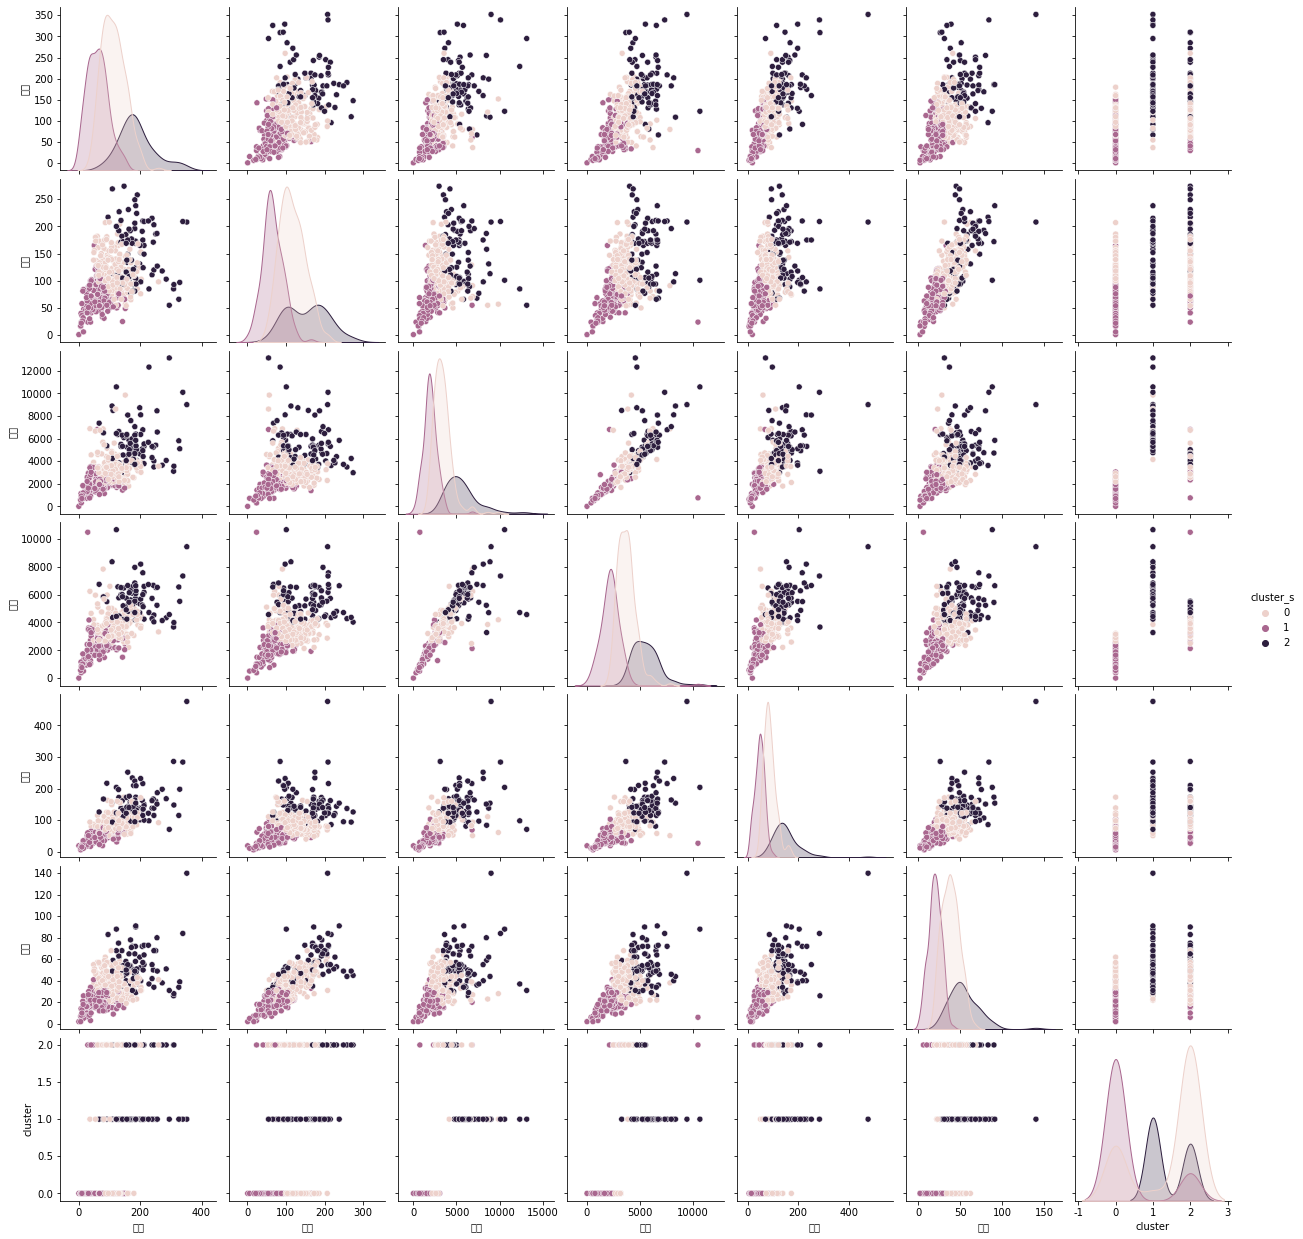

In [102]:
sns.pairplot(df_kmean, hue="cluster_s")

In [202]:
scaled_df['cluster_s'] = pred_s 
scaled_df

,출생,사망,전입,전출,혼인,이혼,cluster_s
0,-1.541630,-1.612458,-1.394382,-1.698988,-1.533594,-1.298103,0
1,0.657550,-1.034447,3.622903,0.387324,-0.532808,-0.421657,1
2,-0.336154,-1.034447,0.595519,-0.178814,0.079919,0.337930,1
3,-0.303573,-0.539008,1.003062,1.526013,0.508827,0.571649,1
4,-0.156961,-0.642224,0.463748,0.793174,-0.001778,0.279500,1
...,...,...,...,...,...,...,...
420,0.234004,-0.229359,0.611642,0.283458,1.489190,0.513219,1
421,1.162547,2.929062,0.212439,0.719442,0.161616,0.805368,2
422,0.331746,0.658302,-0.642123,-0.438481,-0.267293,0.221071,1
423,0.315455,0.224793,-0.399154,-0.275628,0.222888,-0.071078,1


C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51077 missing 

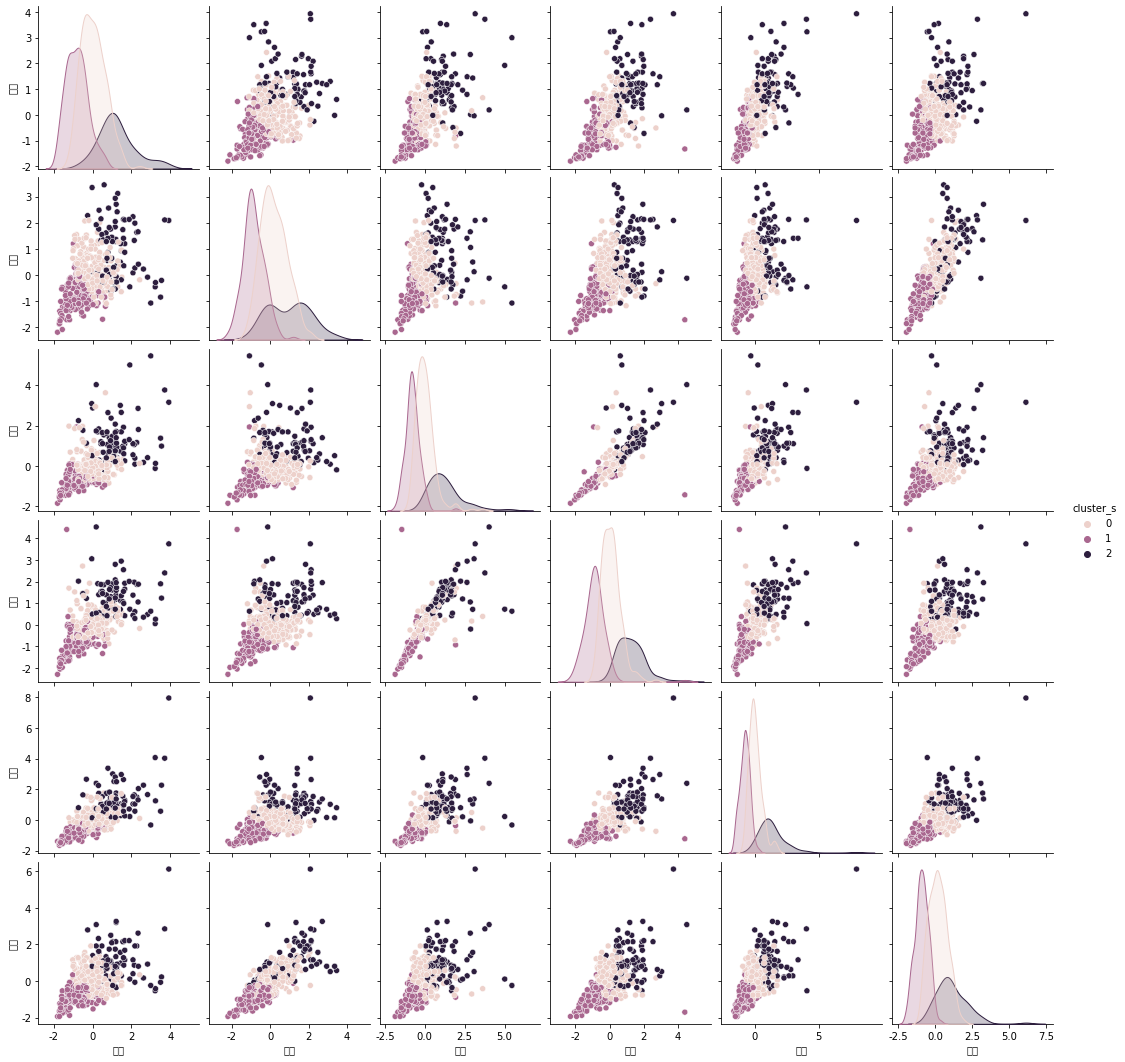

In [104]:
sns.pairplot(scaled_df, hue="cluster_s")

In [194]:
a = pd.read_excel(r'전체동.xlsx')

In [184]:
data = df_kmean.copy()
data["위도"] = df["위도"]
data["경도"] = df["경도"]
data["동"] = a["동"]
data

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,위도,경도,동
0,17,29,829,937,12,13,0,0,37.481054,127.053708,개포1동
1,152,57,9853,4191,61,28,1,1,37.489774,127.069120,개포2동
2,91,57,4408,3308,91,41,2,1,37.478999,127.051657,개포4동
3,93,81,5141,5967,112,45,1,1,37.511555,127.028446,논현1동
4,102,76,4171,4824,87,40,2,1,37.517375,127.037196,논현2동
...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,37.589362,127.074210,상봉2동
421,183,249,3719,4709,95,49,2,2,37.605930,127.099529,신내1동
422,132,139,2182,2903,74,39,0,1,37.606256,127.094209,신내2동
423,131,118,2619,3157,98,34,0,1,37.601147,127.080641,중화1동


In [76]:
data.to_csv("kmeans_6columns_scal.csv", encoding="utf-8-sig")

## 지하철 컬럼 추가해서 해석해보기

In [182]:
sub = pd.read_csv("서울시 동별 지하철 수 .csv",encoding="utf-8")
sub

,구시군,동,지하철 수,역이름
0,종로구,청운효자동,0,NaN
1,종로구,사직동,0,NaN
2,종로구,삼청동,0,NaN
3,종로구,부암동,0,NaN
4,종로구,평창동,0,NaN
...,...,...,...,...
420,강동구,성내3동,1,둔총동역
421,강동구,길동,1,길동역
422,강동구,둔촌1동,2,"둔촌동역,둔촌오륜역"
423,강동구,둔촌2동,0,NaN


In [203]:
scaled_df["동"] = a["동"]
scaled_df["자치구"] = a["자치구"]
d = pd.merge(scaled_df,sub, left_on = ["동","자치구"],right_on = ["동","구시군"], how = "outer")

In [204]:
d

,출생,사망,전입,전출,혼인,이혼,cluster_s,동,자치구,구시군,지하철 수,역이름
0,-1.541630,-1.612458,-1.394382,-1.698988,-1.533594,-1.298103,0,개포1동,강남구,강남구,0,NaN
1,0.657550,-1.034447,3.622903,0.387324,-0.532808,-0.421657,1,개포2동,강남구,강남구,3,"구룡역,개포동역,대모산입구역"
2,-0.336154,-1.034447,0.595519,-0.178814,0.079919,0.337930,1,개포4동,강남구,강남구,0,NaN
3,-0.303573,-0.539008,1.003062,1.526013,0.508827,0.571649,1,논현1동,강남구,강남구,4,"신사역,논현역,신논현역,언주역"
4,-0.156961,-0.642224,0.463748,0.793174,-0.001778,0.279500,1,논현2동,강남구,강남구,4,"학동역,강남구청역,언주역,선정릉역"
...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.234004,-0.229359,0.611642,0.283458,1.489190,0.513219,1,상봉2동,중랑구,중랑구,0,NaN
421,1.162547,2.929062,0.212439,0.719442,0.161616,0.805368,2,신내1동,중랑구,중랑구,2,"봉화산역,신내역"
422,0.331746,0.658302,-0.642123,-0.438481,-0.267293,0.221071,1,신내2동,중랑구,중랑구,1,봉화산역
423,0.315455,0.224793,-0.399154,-0.275628,0.222888,-0.071078,1,중화1동,중랑구,중랑구,1,중화역


In [205]:
d = a.fillna("PASS")

In [206]:
d[d["출생"]=="PASS"]

,Unnamed: 0,동,자치구,출생,사망,전입,전출,혼인,이혼,cluster,주민센터 이름,주민센터 주소,위도,경도


In [209]:
sub_df = pd.merge(scaled_df,sub, left_on = ["동","자치구"],right_on = ["동","구시군"], how = "outer").drop(["동","자치구","구시군","역이름","cluster_s"],axis=1)
sub_df

,출생,사망,전입,전출,혼인,이혼,지하철 수
0,-1.541630,-1.612458,-1.394382,-1.698988,-1.533594,-1.298103,0
1,0.657550,-1.034447,3.622903,0.387324,-0.532808,-0.421657,3
2,-0.336154,-1.034447,0.595519,-0.178814,0.079919,0.337930,0
3,-0.303573,-0.539008,1.003062,1.526013,0.508827,0.571649,4
4,-0.156961,-0.642224,0.463748,0.793174,-0.001778,0.279500,4
...,...,...,...,...,...,...,...
420,0.234004,-0.229359,0.611642,0.283458,1.489190,0.513219,0
421,1.162547,2.929062,0.212439,0.719442,0.161616,0.805368,2
422,0.331746,0.658302,-0.642123,-0.438481,-0.267293,0.221071,1
423,0.315455,0.224793,-0.399154,-0.275628,0.222888,-0.071078,1


In [210]:
kmeans.fit(sub_df) 
centers_s = kmeans.cluster_centers_ 
pred_s = kmeans.predict(sub_df)

In [258]:
df_kmean['cluster_sub'] = pred_s 
df_kmean

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,지하철 수
0,17,29,829,937,12,13,0,0,0,0,0
1,152,57,9853,4191,61,28,1,1,1,2,0
2,91,57,4408,3308,91,41,2,1,2,2,0
3,93,81,5141,5967,112,45,1,1,1,2,0
4,102,76,4171,4824,87,40,2,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,2,1
421,183,249,3719,4709,95,49,2,2,1,1,1
422,132,139,2182,2903,74,39,0,1,2,2,2
423,131,118,2619,3157,98,34,0,1,2,2,0


In [221]:
df_kmean['cluster_sub'].value_counts()

2    192
0    140
1     93
Name: cluster_sub, dtype: int64

In [222]:
df_kmean.describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,111.635294,107.110588,3336.910588,3586.894118,87.087059,35.216471,1.072941,0.872941,1.122353
std,61.458846,48.499023,1800.702209,1561.527677,49.019196,17.134738,0.924941,0.718914,0.876364
min,1.000000,1.000000,1.000000,11.000000,6.000000,2.000000,0.000000,0.000000,0.000000
25%,68.000000,71.000000,2158.000000,2549.000000,56.000000,23.000000,0.000000,0.000000,0.000000
50%,102.000000,100.000000,2965.000000,3389.000000,78.000000,33.000000,1.000000,1.000000,1.000000
75%,148.000000,136.000000,4021.000000,4334.000000,108.000000,46.000000,2.000000,1.000000,2.000000
max,352.000000,274.000000,13142.000000,10648.000000,476.000000,140.000000,2.000000,2.000000,2.000000


In [223]:
df_kmean[df_kmean["cluster_sub"] == 2].describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.0
mean,113.765625,120.520833,3214.718750,3614.744792,86.619792,38.447917,1.437500,1.026042,2.0
std,39.236326,36.066976,941.552508,778.145683,24.815892,10.804178,0.883976,0.189651,0.0
min,37.000000,50.000000,1396.000000,1933.000000,40.000000,19.000000,0.000000,0.000000,2.0
25%,84.000000,95.000000,2621.250000,3026.500000,69.000000,30.000000,0.000000,1.000000,2.0
50%,110.000000,116.000000,3111.500000,3595.500000,82.000000,37.500000,2.000000,1.000000,2.0
75%,139.500000,140.500000,3642.750000,4055.750000,98.000000,46.000000,2.000000,1.000000,2.0
max,260.000000,274.000000,8616.000000,6589.000000,173.000000,73.000000,2.000000,2.000000,2.0


In [224]:
df_kmean[df_kmean["cluster_sub"] == 0].describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.0
mean,61.728571,64.500000,1963.071429,2238.814286,47.564286,19.364286,0.342857,0.007143,0.0
std,34.139334,25.005179,856.762810,1071.530470,19.124059,7.596109,0.756473,0.084515,0.0
min,1.000000,1.000000,1.000000,11.000000,6.000000,2.000000,0.000000,0.000000,0.0
25%,36.000000,50.000000,1532.500000,1670.500000,35.000000,15.000000,0.000000,0.000000,0.0
50%,61.000000,63.000000,1882.500000,2205.500000,48.000000,20.000000,0.000000,0.000000,0.0
75%,83.250000,82.500000,2383.250000,2667.750000,62.000000,24.250000,0.000000,0.000000,0.0
max,152.000000,127.000000,6807.000000,10467.000000,103.000000,41.000000,2.000000,1.000000,0.0


In [225]:
df_kmean[df_kmean["cluster_sub"] == 1].describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.0
mean,182.365591,143.569892,5657.322581,5558.763441,147.548387,52.408602,1.419355,1.860215,1.0
std,59.950847,52.086967,1910.002647,1244.276011,56.305169,17.905693,0.496128,0.348643,0.0
min,67.000000,55.000000,3109.000000,3277.000000,51.000000,26.000000,1.000000,1.000000,1.0
25%,145.000000,97.000000,4321.000000,4658.000000,117.000000,40.000000,1.000000,2.000000,1.0
50%,179.000000,134.000000,5306.000000,5404.000000,138.000000,50.000000,1.000000,2.000000,1.0
75%,207.000000,187.000000,6364.000000,6269.000000,164.000000,62.000000,2.000000,2.000000,1.0
max,352.000000,258.000000,13142.000000,10648.000000,476.000000,140.000000,2.000000,2.000000,1.0


In [226]:
data1 = df_kmean.copy()
data1["위도"] = a["위도"]
data1["경도"] = a["경도"]
data1["동"] = a["동"]
data1

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,위도,경도,동
0,17,29,829,937,12,13,0,0,0,37.481054,127.053708,개포1동
1,152,57,9853,4191,61,28,1,1,1,37.489774,127.069120,개포2동
2,91,57,4408,3308,91,41,2,1,2,37.478999,127.051657,개포4동
3,93,81,5141,5967,112,45,1,1,1,37.511555,127.028446,논현1동
4,102,76,4171,4824,87,40,2,1,1,37.517375,127.037196,논현2동
...,...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,37.589362,127.074210,상봉2동
421,183,249,3719,4709,95,49,2,2,1,37.605930,127.099529,신내1동
422,132,139,2182,2903,74,39,0,1,2,37.606256,127.094209,신내2동
423,131,118,2619,3157,98,34,0,1,2,37.601147,127.080641,중화1동


In [227]:
data1.to_csv("kmeans_6columns_sub.csv", encoding="utf-8-sig")

## 대학수까지 더해서 

In [230]:
uni = pd.read_csv("서울 동별 대학 수.csv",encoding="utf-8")
uni

,구시군,동,대학 수
0,종로구,청운효자동,1
1,종로구,사직동,0
2,종로구,삼청동,0
3,종로구,부암동,1
4,종로구,평창동,0
...,...,...,...
420,강동구,성내3동,0
421,강동구,길동,0
422,강동구,둔촌1동,0
423,강동구,둔촌2동,0


In [232]:
sub_df["동"] = a["동"]
sub_df["자치구"] = a["자치구"]

In [234]:
uni_df = pd.merge(sub_df,uni, left_on = ["동","자치구"],right_on = ["동","구시군"], how = "outer").drop(["동","자치구","구시군","cluster_sub"],axis=1)
uni_df

,출생,사망,전입,전출,혼인,이혼,지하철 수,대학 수
0,-1.541630,-1.612458,-1.394382,-1.698988,-1.533594,-1.298103,0,0
1,0.657550,-1.034447,3.622903,0.387324,-0.532808,-0.421657,3,0
2,-0.336154,-1.034447,0.595519,-0.178814,0.079919,0.337930,0,0
3,-0.303573,-0.539008,1.003062,1.526013,0.508827,0.571649,4,0
4,-0.156961,-0.642224,0.463748,0.793174,-0.001778,0.279500,4,1
...,...,...,...,...,...,...,...,...
420,0.234004,-0.229359,0.611642,0.283458,1.489190,0.513219,0,0
421,1.162547,2.929062,0.212439,0.719442,0.161616,0.805368,2,0
422,0.331746,0.658302,-0.642123,-0.438481,-0.267293,0.221071,1,0
423,0.315455,0.224793,-0.399154,-0.275628,0.222888,-0.071078,1,0


#### 지하철 대학수 같이 낀 것

In [235]:
kmeans.fit(uni_df) 
centers_s = kmeans.cluster_centers_ 
pred_s = kmeans.predict(uni_df)

In [236]:
df_kmean['cluster_uni'] = pred_s 
df_kmean['대학 수 '] = pred_s 
df_kmean

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni
0,17,29,829,937,12,13,0,0,0,0
1,152,57,9853,4191,61,28,1,1,1,2
2,91,57,4408,3308,91,41,2,1,2,1
3,93,81,5141,5967,112,45,1,1,1,2
4,102,76,4171,4824,87,40,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,1
421,183,249,3719,4709,95,49,2,2,1,2
422,132,139,2182,2903,74,39,0,1,2,1
423,131,118,2619,3157,98,34,0,1,2,1


In [237]:
df_kmean['cluster_uni'].value_counts()

1    192
0    140
2     93
Name: cluster_uni, dtype: int64

#### 대학수만 낀 것

In [ ]:
un = uni_df.drop("지하철 수 ", axis=1)

In [ ]:
kmeans.fit(un) 
centers_s = kmeans.cluster_centers_ 
pred_s = kmeans.predict(un)

In [247]:
un['cluster_uni'] = pred_s 
un

,출생,사망,전입,전출,혼인,이혼,대학 수,cluster_uni
0,-1.541630,-1.612458,-1.394382,-1.698988,-1.533594,-1.298103,0,0
1,0.657550,-1.034447,3.622903,0.387324,-0.532808,-0.421657,0,2
2,-0.336154,-1.034447,0.595519,-0.178814,0.079919,0.337930,0,2
3,-0.303573,-0.539008,1.003062,1.526013,0.508827,0.571649,0,2
4,-0.156961,-0.642224,0.463748,0.793174,-0.001778,0.279500,1,2
...,...,...,...,...,...,...,...,...
420,0.234004,-0.229359,0.611642,0.283458,1.489190,0.513219,0,2
421,1.162547,2.929062,0.212439,0.719442,0.161616,0.805368,0,1
422,0.331746,0.658302,-0.642123,-0.438481,-0.267293,0.221071,0,2
423,0.315455,0.224793,-0.399154,-0.275628,0.222888,-0.071078,0,2


In [248]:
un['cluster_uni'].value_counts()

2    199
0    140
1     86
Name: cluster_uni, dtype: int64

In [249]:
df_kmean['cluster_uni'] = pred_s 
df_kmean

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni
0,17,29,829,937,12,13,0,0,0,0
1,152,57,9853,4191,61,28,1,1,1,2
2,91,57,4408,3308,91,41,2,1,2,2
3,93,81,5141,5967,112,45,1,1,1,2
4,102,76,4171,4824,87,40,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,2
421,183,249,3719,4709,95,49,2,2,1,1
422,132,139,2182,2903,74,39,0,1,2,2
423,131,118,2619,3157,98,34,0,1,2,2


In [250]:
data2 = df_kmean.copy()
data2["위도"] = a["위도"]
data2["경도"] = a["경도"]
data2["동"] = a["동"]
data2

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,위도,경도,동
0,17,29,829,937,12,13,0,0,0,0,37.481054,127.053708,개포1동
1,152,57,9853,4191,61,28,1,1,1,2,37.489774,127.069120,개포2동
2,91,57,4408,3308,91,41,2,1,2,2,37.478999,127.051657,개포4동
3,93,81,5141,5967,112,45,1,1,1,2,37.511555,127.028446,논현1동
4,102,76,4171,4824,87,40,2,1,1,2,37.517375,127.037196,논현2동
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,2,37.589362,127.074210,상봉2동
421,183,249,3719,4709,95,49,2,2,1,1,37.605930,127.099529,신내1동
422,132,139,2182,2903,74,39,0,1,2,2,37.606256,127.094209,신내2동
423,131,118,2619,3157,98,34,0,1,2,2,37.601147,127.080641,중화1동


In [251]:
data2.to_csv("kmeans_6columns_uni.csv", encoding="utf-8-sig")

In [253]:
data2[data2["cluster_sub"] != data2["cluster_uni"]]

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,위도,경도,동
1,152,57,9853,4191,61,28,1,1,1,2,37.489774,127.069120,개포2동
3,93,81,5141,5967,112,45,1,1,1,2,37.511555,127.028446,논현1동
4,102,76,4171,4824,87,40,2,1,1,2,37.517375,127.037196,논현2동
6,80,91,6859,7825,51,38,1,1,1,2,37.502307,127.064213,대치2동
29,204,103,3917,4453,130,31,2,1,1,2,37.549759,127.145999,명일1동
44,51,165,1396,1933,45,33,0,0,2,0,37.625137,127.044834,번3동
61,170,133,3795,4734,92,54,2,1,1,2,37.553147,126.833307,발산1동
74,41,59,4559,4649,80,19,2,1,0,2,37.476275,126.958408,낙성대동
117,121,96,4411,4658,122,44,2,1,1,2,37.487401,126.890400,구로3동
142,172,138,3917,4781,145,51,2,2,2,1,37.654856,127.067016,상계6.7동


In [276]:
df_kmean["동"] = a["동"]
df_kmean["자치구"] = a["자치구"]
df_kmean

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,동,자치구
0,17,29,829,937,12,13,0,0,0,0,개포1동,강남구
1,152,57,9853,4191,61,28,1,1,1,2,개포2동,강남구
2,91,57,4408,3308,91,41,2,1,2,2,개포4동,강남구
3,93,81,5141,5967,112,45,1,1,1,2,논현1동,강남구
4,102,76,4171,4824,87,40,2,1,1,2,논현2동,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,2,상봉2동,중랑구
421,183,249,3719,4709,95,49,2,2,1,1,신내1동,중랑구
422,132,139,2182,2903,74,39,0,1,2,2,신내2동,중랑구
423,131,118,2619,3157,98,34,0,1,2,2,중화1동,중랑구


In [277]:
df_kmean = pd.merge(df_kmean,sub, left_on = ["동","자치구"],right_on = ["동","구시군"], how = "outer").drop(["자치구","역이름"],axis=1)

In [278]:
df_kmean = pd.merge(df_kmean,uni, on = ["동","구시군"], how = "outer")

In [279]:
df_kmean[df_kmean["cluster_uni"]==0].describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,지하철 수,대학 수
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.0,140.000000,140.0,140.000000,140.000000
mean,61.800000,65.257143,1940.478571,2219.414286,47.314286,19.464286,0.328571,0.0,0.014286,0.0,0.892857,0.150000
std,34.106098,26.403175,829.072347,1051.988579,18.924722,7.682935,0.743730,0.0,0.169031,0.0,0.862458,0.447616
min,1.000000,1.000000,1.000000,11.000000,6.000000,2.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,36.000000,50.000000,1528.750000,1670.500000,35.000000,15.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,61.000000,63.000000,1868.000000,2204.500000,48.000000,20.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000
75%,83.250000,84.000000,2381.250000,2632.500000,61.250000,25.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000
max,152.000000,165.000000,6807.000000,10467.000000,103.000000,41.000000,2.000000,0.0,2.000000,0.0,4.000000,2.000000


In [280]:
df_kmean[df_kmean["cluster_uni"]==1].describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,지하철 수,대학 수
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0,86.000000,86.0,86.000000,86.000000
mean,188.186047,154.081395,5617.093023,5558.813953,151.500000,54.081395,1.406977,2.0,1.069767,1.0,1.779070,0.116279
std,58.718173,52.698748,1941.667262,1267.345837,56.159385,18.173811,0.494152,0.0,0.256249,0.0,1.044889,0.417798
min,67.000000,55.000000,2980.000000,3277.000000,71.000000,26.000000,1.000000,2.0,1.000000,1.0,0.000000,0.000000
25%,154.250000,105.250000,4261.000000,4587.000000,119.500000,42.000000,1.000000,2.0,1.000000,1.0,1.000000,0.000000
50%,183.000000,165.000000,5308.000000,5444.000000,139.500000,51.000000,1.000000,2.0,1.000000,1.0,2.000000,0.000000
75%,212.250000,192.750000,6364.000000,6270.500000,167.000000,64.750000,2.000000,2.0,1.000000,1.0,2.000000,0.000000
max,352.000000,274.000000,13142.000000,10648.000000,476.000000,140.000000,2.000000,2.0,2.000000,1.0,6.000000,3.000000


In [281]:
df_kmean[df_kmean["cluster_uni"]==2].describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,지하철 수,대학 수
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.0,199.000000,199.0,199.000000,199.000000
mean,113.613065,116.256281,3333.919598,3696.753769,87.231156,38.145729,1.452261,1.0,1.924623,2.0,1.085427,0.155779
std,38.555824,32.778098,1097.963976,855.480239,24.891417,10.336455,0.868345,0.0,0.283105,0.0,0.988693,0.415428
min,37.000000,50.000000,1678.000000,2137.000000,40.000000,19.000000,0.000000,1.0,0.000000,2.0,0.000000,0.000000
25%,84.500000,92.500000,2628.000000,3070.000000,69.500000,30.000000,0.500000,1.0,2.000000,2.0,0.000000,0.000000
50%,109.000000,112.000000,3176.000000,3623.000000,82.000000,38.000000,2.000000,1.0,2.000000,2.0,1.000000,0.000000
75%,139.000000,139.000000,3772.500000,4142.500000,99.000000,45.500000,2.000000,1.0,2.000000,2.0,2.000000,0.000000
max,260.000000,208.000000,9853.000000,7825.000000,173.000000,68.000000,2.000000,1.0,2.000000,2.0,5.000000,2.000000


## 인구 비율로 보기

In [332]:
pop = pd.read_csv('서울시 주민등록인구(연령별_동별) 통계.csv',thousands=',')
pop.drop("기간",axis=1, inplace=True)

In [333]:
pop

,자치구,동,구분,계,0~19세,20~39세,40~59세,60~79세,80세 이상
0,종로구,사직동,계,9630,1250,2731,3133,1950,566
1,종로구,사직동,한국인,9370,1233,2642,3007,1925,563
2,종로구,사직동,외국인,260,17,89,126,25,3
3,종로구,삼청동,계,2741,345,678,833,703,182
4,종로구,삼청동,한국인,2441,265,622,724,650,180
...,...,...,...,...,...,...,...,...,...
1270,강동구,강일동,한국인,32762,6576,8111,10112,6880,1083
1271,강동구,강일동,외국인,185,4,107,58,15,1
1272,강동구,상일동,계,49086,11184,12387,16030,8497,988
1273,강동구,상일동,한국인,48932,11171,12333,15955,8486,987


In [334]:
pop_t = pop.iloc[0::3]
pop_k = pop.iloc[1::3]
pop_f = pop.iloc[2::3]

In [335]:
rate = pd.merge(df_kmean,pop_t.loc[:,["계","동","자치구"]], left_on=["동","구시군"],right_on=["동","자치구"] ,how="outer")

In [337]:
rate = pd.merge(rate,pop_k.loc[:,["계","동","자치구"]], left_on=["동","구시군"],right_on=["동","자치구"] )

In [338]:
rate = pd.merge(rate,pop_f.loc[:,["계","동","자치구"]], left_on=["동","구시군"],right_on=["동","자치구"] )

In [339]:
rate.drop(["자치구_x","자치구_y","자치구"],axis=1, inplace=True)

In [340]:
rate

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,동,구시군,지하철 수,대학 수,계_x,계_y,계
0,17,29,829,937,12,13,0,0,0,0,개포1동,강남구,0,0,6982,6962,20
1,152,57,9853,4191,61,28,1,1,1,2,개포2동,강남구,3,0,28240,28164,76
2,91,57,4408,3308,91,41,2,1,2,2,개포4동,강남구,0,0,23790,23641,149
3,93,81,5141,5967,112,45,1,1,1,2,논현1동,강남구,4,0,22583,21973,610
4,102,76,4171,4824,87,40,2,1,1,2,논현2동,강남구,4,1,21300,20971,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,2,상봉2동,중랑구,0,0,20558,20250,308
421,183,249,3719,4709,95,49,2,2,1,1,신내1동,중랑구,2,0,38522,38381,141
422,132,139,2182,2903,74,39,0,1,2,2,신내2동,중랑구,1,0,20311,20222,89
423,131,118,2619,3157,98,34,0,1,2,2,중화1동,중랑구,1,0,19669,19495,174


In [341]:
rate["출생비_t"] = rate["출생"] / rate["계_x"]
rate["출생비_k"] = rate["출생"] / rate["계_y"]
rate["사망비_t"] = rate["사망"] / rate["계_x"]
rate["사망비_k"] = rate["사망"] / rate["계_y"]
rate["혼인비_t"] = rate["혼인"] / rate["계_x"]
rate["혼인비_k"] = rate["혼인"] / rate["계_y"]
rate["이혼비_t"] = rate["이혼"] / rate["계_x"]
rate["이혼비_k"] = rate["이혼"] / rate["계_y"]

In [342]:
rate.drop(["출생","사망","혼인","이혼","cluster","cluster_s","cluster_sub","cluster_uni"],axis=1,inplace=True)

#### 한국인의 수로만 비율

In [343]:
in_col = ['출생비_k', '사망비_k', '혼인비_k', '이혼비_k','지하철 수 ','대학 수']
rate_k = rate[in_col]
rate_k["전입_s"] = sub_df["전입"]
rate_k["전출_s"] = sub_df["전출"]
rate_k

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_28204/656282874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_k["전입_s"] = sub_df["전입"]
C:\Users\MEDICI\AppData\Local\Temp/ipykernel_28204/656282874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_k["전출_s"] = sub_df["전출"]


,출생비_k,사망비_k,혼인비_k,이혼비_k,지하철 수,대학 수,전입_s,전출_s
0,0.002442,0.004165,0.001724,0.001867,0,0,-1.394382,-1.698988
1,0.005397,0.002024,0.002166,0.000994,3,0,3.622903,0.387324
2,0.003849,0.002411,0.003849,0.001734,0,0,0.595519,-0.178814
3,0.004232,0.003686,0.005097,0.002048,4,0,1.003062,1.526013
4,0.004864,0.003624,0.004149,0.001907,4,1,0.463748,0.793174
...,...,...,...,...,...,...,...,...
420,0.006222,0.004741,0.007901,0.002173,0,0,0.611642,0.283458
421,0.004768,0.006488,0.002475,0.001277,2,0,0.212439,0.719442
422,0.006528,0.006874,0.003659,0.001929,1,0,-0.642123,-0.438481
423,0.006720,0.006053,0.005027,0.001744,1,0,-0.399154,-0.275628


In [345]:
kmeans.fit(rate_k) 
centers_s = kmeans.cluster_centers_ 
pred_s = kmeans.predict(rate_k)

In [346]:
df_kmean['cluster_rate_k'] = pred_s 
df_kmean

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,동,구시군,지하철 수,대학 수,cluster_rate_k
0,17,29,829,937,12,13,0,0,0,0,개포1동,강남구,0,0,1
1,152,57,9853,4191,61,28,1,1,1,2,개포2동,강남구,3,0,0
2,91,57,4408,3308,91,41,2,1,2,2,개포4동,강남구,0,0,2
3,93,81,5141,5967,112,45,1,1,1,2,논현1동,강남구,4,0,0
4,102,76,4171,4824,87,40,2,1,1,2,논현2동,강남구,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,2,상봉2동,중랑구,0,0,2
421,183,249,3719,4709,95,49,2,2,1,1,신내1동,중랑구,2,0,2
422,132,139,2182,2903,74,39,0,1,2,2,신내2동,중랑구,1,0,1
423,131,118,2619,3157,98,34,0,1,2,2,중화1동,중랑구,1,0,2


In [351]:
df_kmean["cluster_rate_k"].value_counts()

2    180
1    152
0     93
Name: cluster_rate_k, dtype: int64

#### 한국인 + 외국인 전체 인구수 비율

In [344]:
in_col = ['출생비_t', '사망비_t', '혼인비_t', '이혼비_t','지하철 수 ','대학 수']
rate_t = rate[in_col]
rate_t["전입_s"] = sub_df["전입"]
rate_t["전출_s"] = sub_df["전출"]
rate_t

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_28204/1201756872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_t["전입_s"] = sub_df["전입"]
C:\Users\MEDICI\AppData\Local\Temp/ipykernel_28204/1201756872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_t["전출_s"] = sub_df["전출"]


,출생비_t,사망비_t,혼인비_t,이혼비_t,지하철 수,대학 수,전입_s,전출_s
0,0.002435,0.004154,0.001719,0.001862,0,0,-1.394382,-1.698988
1,0.005382,0.002018,0.002160,0.000992,3,0,3.622903,0.387324
2,0.003825,0.002396,0.003825,0.001723,0,0,0.595519,-0.178814
3,0.004118,0.003587,0.004959,0.001993,4,0,1.003062,1.526013
4,0.004789,0.003568,0.004085,0.001878,4,1,0.463748,0.793174
...,...,...,...,...,...,...,...,...
420,0.006129,0.004670,0.007783,0.002140,0,0,0.611642,0.283458
421,0.004751,0.006464,0.002466,0.001272,2,0,0.212439,0.719442
422,0.006499,0.006844,0.003643,0.001920,1,0,-0.642123,-0.438481
423,0.006660,0.005999,0.004982,0.001729,1,0,-0.399154,-0.275628


In [347]:
kmeans.fit(rate_t) 
centers_s = kmeans.cluster_centers_ 
pred_s = kmeans.predict(rate_t)

In [348]:
df_kmean['cluster_rate_t'] = pred_s 
df_kmean

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,동,구시군,지하철 수,대학 수,cluster_rate_k,cluster_rate_t
0,17,29,829,937,12,13,0,0,0,0,개포1동,강남구,0,0,1,1
1,152,57,9853,4191,61,28,1,1,1,2,개포2동,강남구,3,0,0,0
2,91,57,4408,3308,91,41,2,1,2,2,개포4동,강남구,0,0,2,2
3,93,81,5141,5967,112,45,1,1,1,2,논현1동,강남구,4,0,0,0
4,102,76,4171,4824,87,40,2,1,1,2,논현2동,강남구,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,2,상봉2동,중랑구,0,0,2,2
421,183,249,3719,4709,95,49,2,2,1,1,신내1동,중랑구,2,0,2,2
422,132,139,2182,2903,74,39,0,1,2,2,신내2동,중랑구,1,0,1,1
423,131,118,2619,3157,98,34,0,1,2,2,중화1동,중랑구,1,0,2,2


In [350]:
df_kmean["cluster_rate_t"].value_counts()

2    180
1    152
0     93
Name: cluster_rate_t, dtype: int64

In [352]:
data3 = df_kmean.copy()
data3["위도"] = a["위도"]
data3["경도"] = a["경도"]
data3

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,동,구시군,지하철 수,대학 수,cluster_rate_k,cluster_rate_t,위도,경도
0,17,29,829,937,12,13,0,0,0,0,개포1동,강남구,0,0,1,1,37.481054,127.053708
1,152,57,9853,4191,61,28,1,1,1,2,개포2동,강남구,3,0,0,0,37.489774,127.069120
2,91,57,4408,3308,91,41,2,1,2,2,개포4동,강남구,0,0,2,2,37.478999,127.051657
3,93,81,5141,5967,112,45,1,1,1,2,논현1동,강남구,4,0,0,0,37.511555,127.028446
4,102,76,4171,4824,87,40,2,1,1,2,논현2동,강남구,4,1,0,0,37.517375,127.037196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,2,상봉2동,중랑구,0,0,2,2,37.589362,127.074210
421,183,249,3719,4709,95,49,2,2,1,1,신내1동,중랑구,2,0,2,2,37.605930,127.099529
422,132,139,2182,2903,74,39,0,1,2,2,신내2동,중랑구,1,0,1,1,37.606256,127.094209
423,131,118,2619,3157,98,34,0,1,2,2,중화1동,중랑구,1,0,2,2,37.601147,127.080641


In [353]:
data3.to_csv("kmeans_8columns_rate.csv", encoding="utf-8-sig")

In [382]:
data3["cluster_rate_k"].replace({0:2,1:0,2:1}, inplace=True)

In [383]:
data3["cluster_rate_k"].value_counts()

1    180
0    152
2     93
Name: cluster_rate_k, dtype: int64

In [374]:
data3["cluster_s"].value_counts()

1    199
0    140
2     86
Name: cluster_s, dtype: int64

In [410]:
data3["cluster_sub"].value_counts()

2    192
0    140
1     93
Name: cluster_sub, dtype: int64

In [386]:
data3[data3["cluster_rate_k"] != data3["cluster_s"]]

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,동,구시군,지하철 수,대학 수,cluster_rate_k,cluster_rate_t,위도,경도
1,152,57,9853,4191,61,28,1,1,1,2,개포2동,강남구,3,0,2,0,37.489774,127.069120
3,93,81,5141,5967,112,45,1,1,1,2,논현1동,강남구,4,0,2,0,37.511555,127.028446
4,102,76,4171,4824,87,40,2,1,1,2,논현2동,강남구,4,1,2,0,37.517375,127.037196
5,33,41,2965,3610,27,16,2,0,0,0,대치1동,강남구,2,0,1,2,37.493291,127.056803
6,80,91,6859,7825,51,38,1,1,1,2,대치2동,강남구,3,0,2,0,37.502307,127.064213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,90,101,2272,2549,65,27,0,0,0,0,약수동,중구,2,0,1,2,37.552466,127.009006
409,66,110,2105,2733,60,57,0,1,2,2,망우3동,중랑구,0,0,0,1,37.605688,127.100864
411,106,155,2834,3459,159,68,2,1,2,2,면목2동,중랑구,0,0,0,1,37.589764,127.079042
421,183,249,3719,4709,95,49,2,2,1,1,신내1동,중랑구,2,0,1,2,37.605930,127.099529


In [387]:
rate_k["동"] = a["동"]

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_28204/1796451834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_k["동"] = a["동"]


In [408]:
rate_k[rate_k["동"] == data3[data3["cluster_rate_k"] != data3["cluster_s"]]["동"]]

ValueError: Can only compare identically-labeled Series objects

In [407]:
data3[data3["cluster_rate_k"] != data3["cluster_s"]]["동"]

1      개포2동
3      논현1동
4      논현2동
5      대치1동
6      대치2동
       ... 
401     약수동
409    망우3동
411    면목2동
421    신내1동
422    신내2동
Name: 동, Length: 124, dtype: object

In [413]:
rate_k["cluster_rate"] = df_kmean['cluster_rate_k']

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_28204/3093849200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_k["cluster_rate"] = df_kmean['cluster_rate_k']


In [414]:
rate_k.describe()

,출생비_k,사망비_k,혼인비_k,이혼비_k,지하철 수,대학 수,전입_s,전출_s,cluster_rate
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,4.250000e+02,4.250000e+02,425.000000
mean,0.005006,0.005070,0.004354,0.001658,1.162353,0.145882,-1.202633e-16,6.210718e-17,1.204706
std,0.002646,0.002248,0.007162,0.000908,1.011488,0.426026,1.001179e+00,1.001179e+00,0.775799
min,0.001201,0.001296,0.001051,0.000365,0.000000,0.000000,-1.854744e+00,-2.292696e+00,0.000000
25%,0.003650,0.003842,0.003029,0.001236,0.000000,0.000000,-6.554665e-01,-6.654492e-01,1.000000
50%,0.004774,0.004769,0.003729,0.001581,1.000000,0.000000,-2.067798e-01,-1.268805e-01,1.000000
75%,0.005775,0.005900,0.004591,0.001935,2.000000,0.000000,3.803492e-01,4.790094e-01,2.000000
max,0.044776,0.035821,0.143939,0.015152,6.000000,3.000000,5.451565e+00,4.527251e+00,2.000000


In [415]:
rate_k[rate_k["cluster_rate"]==0].describe()

,출생비_k,사망비_k,혼인비_k,이혼비_k,지하철 수,대학 수,전입_s,전출_s,cluster_rate
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.0
mean,0.005547,0.004356,0.004690,0.001592,2.150538,0.139785,1.361020,1.370178,0.0
std,0.004362,0.003518,0.004086,0.000886,1.122364,0.456627,1.079291,0.837051,0.0
min,0.001562,0.001296,0.001389,0.000659,0.000000,0.000000,-1.437749,-0.198690,0.0
25%,0.004402,0.003206,0.003251,0.001171,1.000000,0.000000,0.673914,0.793174,0.0
50%,0.004995,0.003806,0.004188,0.001494,2.000000,0.000000,1.123712,1.242623,0.0
75%,0.005832,0.004932,0.004974,0.001869,3.000000,0.000000,1.731969,1.848513,0.0
max,0.044776,0.035821,0.040299,0.008955,6.000000,3.000000,5.451565,4.527251,0.0


In [416]:
rate_k[rate_k["cluster_rate"]==1].describe()

,출생비_k,사망비_k,혼인비_k,이혼비_k,지하철 수,대학 수,전입_s,전출_s,cluster_rate
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.0
mean,0.004704,0.005629,0.004642,0.001775,0.526316,0.085526,-0.809703,-0.880560,1.0
std,0.002005,0.001893,0.011453,0.001236,0.597427,0.344187,0.333429,0.474846,0.0
min,0.001201,0.001521,0.001051,0.000365,0.000000,0.000000,-1.854744,-2.292696,1.0
25%,0.003238,0.004363,0.002719,0.001249,0.000000,0.000000,-0.977248,-1.159939,1.0
50%,0.004378,0.005302,0.003651,0.001631,0.000000,0.000000,-0.777229,-0.812273,1.0
75%,0.005671,0.006791,0.004483,0.002028,1.000000,0.000000,-0.573179,-0.546515,1.0
max,0.010950,0.012453,0.143939,0.015152,2.000000,2.000000,-0.144509,0.043025,1.0


In [417]:
rate_k[rate_k["cluster_rate"]==2].describe()

,출생비_k,사망비_k,혼인비_k,이혼비_k,지하철 수,대학 수,전입_s,전출_s,cluster_rate
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.0
mean,0.004982,0.004968,0.003938,0.001595,1.188889,0.200000,-0.019444,0.035659,2.0
std,0.001784,0.001429,0.001407,0.000492,0.789519,0.465575,0.402863,0.434592,0.0
min,0.001375,0.001708,0.001125,0.000423,0.000000,0.000000,-0.959039,-1.306602,2.0
25%,0.003752,0.004061,0.003130,0.001253,1.000000,0.000000,-0.266271,-0.246936,2.0
50%,0.004939,0.004822,0.003698,0.001590,1.000000,0.000000,-0.024692,0.065786,2.0
75%,0.005749,0.005814,0.004434,0.001912,2.000000,0.000000,0.189782,0.353504,2.0
max,0.013771,0.011211,0.012746,0.003507,4.000000,2.000000,1.929347,1.117598,2.0


In [418]:
rate_k.to_csv("컬럼6개_비율.csv", encoding="utf-8-sig")